In [6]:
import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parent))

from IPython.display import display
from PIL import Image, ImageDraw
from shared.drawing import *

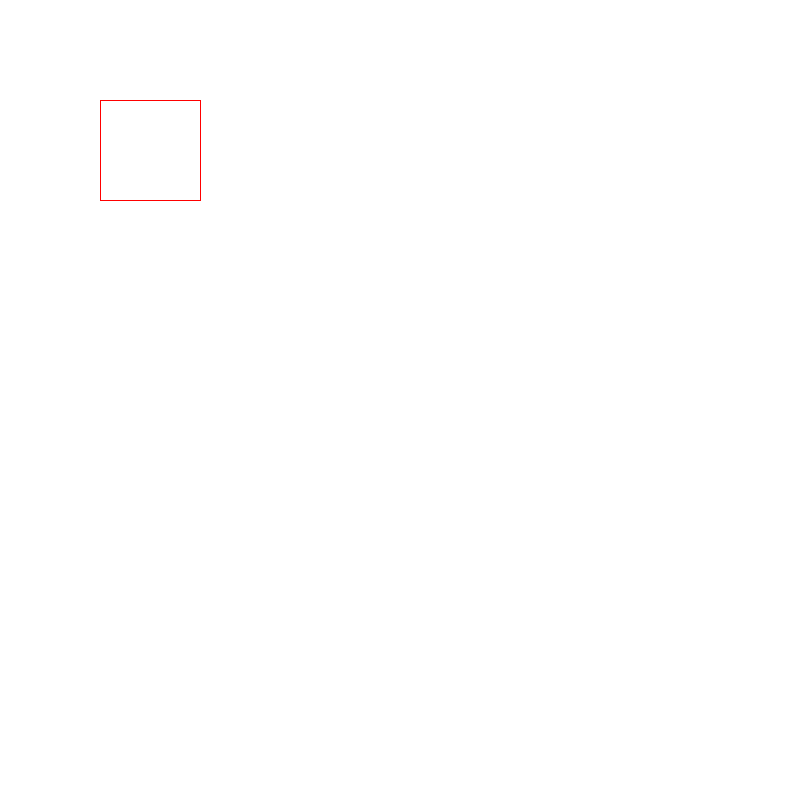

In [43]:
square_size = 100
rows, cols = 8, 8

img_width, img_height = square_size * cols, square_size * rows

image = Image.new('RGB', (img_width, img_height), 'white')

draw = ImageDraw.Draw(image)

draw.rectangle(
            [(1 * square_size), (1 * square_size),
             ((1 + 1) * square_size), ((1 + 1) * square_size)],
             fill=Color(200, 50, 100).as_rgb(),
             outline='red',
             width=1)

display(image)

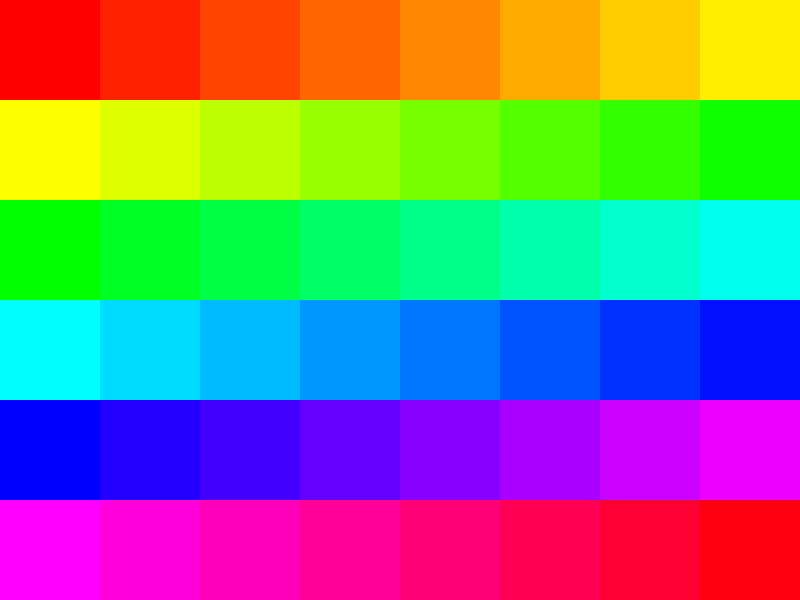

In [52]:
square_size = 100
rows, cols = 6, 8

img_width, img_height = square_size * cols, square_size * rows

image = Image.new('RGB', (img_width, img_height), 'white')

draw = ImageDraw.Draw(image)


for row in range(rows):
    hue = row * (360/rows)

    for col in range(cols):
        start_x = col * square_size
        start_y = row * square_size
        end_x = (1 + col) * square_size
        end_y = (1 + row) * square_size

        color = Color(hue + (col * cols), 100, 50).as_rgb()

        draw.rectangle(
            [(start_x, start_y), (end_x, end_y)], color
        )

display(image)